In [52]:
# load some packages
import matplotlib.pyplot as plt
import healpy as hp
import numpy as np
import pandas as pd

# load the catalogue
# catalogue1000 = np.load('catalogue_1000sqd.npy')
catalogue = np.load('catalogue.npy')

In [53]:
print(catalogue.dtype.names)

('gamma1', 'int_e1', 'template_coeffs', 'z', 'dec', 'ra', 'excess_b_v', 'int_mag g', 'id', 'e1', 'mag g', 'abs_mag_lumfun', 'int_e2', 'int_r50', 'e2', 'sersic_n', 'gamma2', 'galaxy_type', 'r50', 'template_coeffs_abs', 'abs_mag g', 'kappa', 'e_abs', 'bkg_noise_amp g', 'int_mag r', 'mag r', 'abs_mag r', 'bkg_noise_amp r', 'int_mag i', 'mag i', 'abs_mag i', 'bkg_noise_amp i', 'int_mag z', 'mag z', 'abs_mag z', 'bkg_noise_amp z', 'int_mag y', 'mag y', 'abs_mag y', 'bkg_noise_amp y')


In [54]:
nside = 64 # HEALPix nside parameter

#Load the Power Spectrum and generate a convergence map
cl_kappa = np.loadtxt('cl_kappa.txt')
cl_kappa = np.concatenate((np.zeros(2), cl_kappa)) # add zeros for monopole and dipole
kappamap = hp.synfast(cl_kappa, nside) # generate a convergence map
print("Cl_kappa shape:", cl_kappa.shape, "   kappamap shape:", kappamap.shape )

# cl_kappa_225 = np.loadtxt('cl_kappa_mean_225.txt')[:,1]
# cl_kappa_225 = np.concatenate((np.zeros(2), cl_kappa_225)) # add zeros for monopole and dipole
# kappamap_225 = hp.synfast(cl_kappa_225, nside)
# print("Cl_kappa225 shape:", cl_kappa_225.shape, "   kappamap225 shape:", kappamap_225.shape )

Cl_kappa shape: (10000,)    kappamap shape: (49152,)


In [55]:
# print("ndarray.dtype:", len(catalogue1000.dtype.names))
# print("ndarray.dtype:", len(catalogue.dtype.names))
# cat_unique = np.unique(catalogue.dtype.names)
# cat1000_unique = np.unique(catalogue1000.dtype.names)

pixscale = 0.263
sizes_in_arcsec = catalogue['r50'] * pixscale   # arcsec
# sizes_in_arcsec1000 = catalogue1000['r50'] * pixscale   #arcsec


In [56]:
print(min(catalogue['dec']), max(catalogue['dec']))
print(min(catalogue['ra']), max(catalogue['ra']))

print( "\nrange of DEC of catalogue:")
print(f"[{min(catalogue['dec'])},{max(catalogue['dec'])}]" )
print( "\nrange of RA of catalogue:")
print(f"[{min(catalogue['ra'])},{max(catalogue['ra'])}]" )

# print( "\nrange of DEC of catalogue1000:")
# print(f"[{min(catalogue1000['dec'])},{max(catalogue1000['dec'])}]" )
# print( "\nrange of RA of catalogue1000:")
# print(f"[{min(catalogue1000['ra'])},{max(catalogue1000['ra'])}]" )


88.541504 89.99697
0.0027501348 89.99532

range of DEC of catalogue:
[88.54150390625,89.9969711303711]

range of RA of catalogue:
[0.0027501347940415144,89.99532318115234]


In [57]:
# Convert galaxy coordinates to HEALPix pixel indices
galaxy_pix = hp.ang2pix(nside, np.deg2rad(catalogue['ra']), np.deg2rad(catalogue['dec']))  
galaxy_pix_unique, galaxy_pix_counts = np.unique(galaxy_pix, return_counts=True)
print("Galaxy pixels:",galaxy_pix, "   Length of Galaxy pixels(should match nr. of galaxies):", len(galaxy_pix))
n_pixels = hp.nside2npix(nside)
print("Total number of galaxies:", len(catalogue))
print("Total number of pixels:", n_pixels)
print("Number of unique pixels with galaxies:", len(galaxy_pix_unique))
print("Max number of galaxies in a pixel:", np.max(galaxy_pix_counts))
print('-'*30)


# galaxy_pix1000= hp.ang2pix(nside, catalogue1000['ra'], catalogue1000['dec'], lonlat=True)
# galaxy_pix1000_unique, galaxy_pix1000_counts = np.unique(galaxy_pix1000, return_counts=True)
# print("Galaxy pixels:",galaxy_pix1000, "   Length of Galaxy pixels(should match nr. of galaxies):", len(galaxy_pix1000))
# print("Total number of galaxies:", len(catalogue1000))
# print("Total number of pixels:", n_pixels)
# print("Number of unique pixels with galaxies:", len(galaxy_pix1000_unique))
# print("Max number of galaxies in a pixel:", np.max(galaxy_pix1000_counts))
# print('-'*30)

Galaxy pixels: [6215 1769 7139 ... 2849 1890 4370]    Length of Galaxy pixels(should match nr. of galaxies): 117628
Total number of galaxies: 117628
Total number of pixels: 49152
Number of unique pixels with galaxies: 160
Max number of galaxies in a pixel: 1930
------------------------------


In [58]:
# Add a float32 field named 'pixel'
new_dtype = catalogue.dtype.descr + [('pixel', 'int32')]
catalogue2 = np.empty(catalogue.shape, dtype=new_dtype)
# catalogue1000_2 = np.empty(catalogue1000.shape, dtype=new_dtype)
for name in catalogue.dtype.names:
    catalogue2[name] = catalogue[name]
    # catalogue1000_2[name] = catalogue1000[name]

catalogue2['pixel'] = galaxy_pix  # Assign the pixel to each galaxy
# catalogue1000_2['pixel'] = galaxy_pix1000

In [59]:
# lon_center = np.mean(catalogue1000['ra'])
# lat_center = np.mean(catalogue1000['dec'])
# lon_range = 1 # plotting range in degrees
# lat_range = 1

# hp.cartview(lonra=[lon_center-lon_range / 2, lon_center+lon_range/2], latra=[lat_center-lat_range/2, lat_center+lat_range/2], title="Galaxy Distribution", cbar=False)
# hp.projscatter(catalogue1000['ra'],catalogue1000['dec'], s=sizes_in_arcsec1000,lonlat=True)
# plt.show()


In [60]:
# hp.cartview(kappamap_225,lonra=[lon_center-10-lon_range/2, lon_center-10+lon_range/2], latra=[lat_center-20-lat_range/2, lat_center-20+lat_range/2], title='$\kappa$', cbar=True) # plot a subregion corresponding to size of galaxy distribution seen earlier
# plt.show()

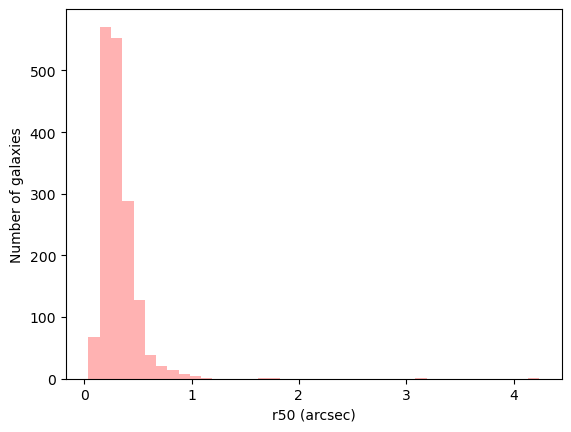

In [61]:
plt.figure()
plt.hist(sizes_in_arcsec1000[catalogue1000_2['pixel'] == galaxy_pix1000_unique[0]], bins=40, alpha=0.3, color='r')
# plt.hist(sizes_in_arcsec1000, bins=100, alpha=0.3, color='b')
plt.xlabel('r50 (arcsec)')
plt.ylabel('Number of galaxies')
plt.show()

In [ ]:
for i in galaxy_pix_unique[:10]:  # Just show the first 10 unique pixels for brevity
    print(f"Pixel {i} has {galaxy_pix_counts[galaxy_pix_unique == i][0]} galaxies")
    plt.hist(sizes_in_arcsec[catalogue2['pixel'] == i], bins=30)
    plt.xlabel('r50 (arcsec)')
    plt.ylabel('Number of galaxies')
    plt.title(f'Size distribution in Pixel {i}')
    plt.show()

## Implementation of the Maximum Mean Distance (MMD) between two distributions given only their samples.


### Note: Eventuell muss man noch die sample data normalisieren!

In [63]:
import sklearn
from sklearn.metrics.pairwise import pairwise_distances, rbf_kernel,  polynomial_kernel, linear_kernel, sigmoid_kernel, laplacian_kernel, chi2_kernel

# print("pixel 0:", "\nMIN:", sizes_in_arcsec1000[catalogue1000_2['pixel'] == galaxy_pix1000_unique[0]].min(),
#       ", MAX():", sizes_in_arcsec1000[catalogue1000_2['pixel'] == galaxy_pix1000_unique[0]].max(),
#       ", MEAN():", sizes_in_arcsec1000[catalogue1000_2['pixel'] == galaxy_pix1000_unique[0]].mean())
# print("Whole Disitribution:", "\nMIN:", sizes_in_arcsec1000.min(),
#       ", MAX():", sizes_in_arcsec1000.max(),
#       ", MEAN():", sizes_in_arcsec1000.mean())

# print("\nComparing one pixel with the entire catalogue, we see that their Max/Min values are quite different.",
#       "\nThis could lead to numerical issues when calculating the MMD if we use a fixed bandwidth for the RBF kernel.",
#       "\nThink of normalizing the data before computing the MMD.")

In [64]:
# Only usable for small sample sizes
def MMD2_biased(X, Y, kernel=rbf_kernel, **kwargs):
    """Compute the biased estimate of Maximum Mean Discrepancy (MMD) between two samples: X and Y.
    
    Parameters:
    - X: np.ndarray of shape (n_samples_X, n_features)
    - Y: np.ndarray of shape (n_samples_Y, n_features)
    - kernel: function, the kernel function to use (default: RBF kernel)
    - **kwargs: additional arguments for the kernel function
    
    Returns:
    - mmd2: float, the biased MMD^2 estimate
    """
    K_XX = kernel(X, X, **kwargs)
    K_YY = kernel(Y, Y, **kwargs)
    K_XY = kernel(X, Y, **kwargs)
    
    mmd2 = K_XX.mean() + K_YY.mean() - 2 * K_XY.mean()
    return mmd2

Calculating K_YY is very expensive and takes a lot of time, since Y has 117,000 samples. Instead of caluclating K_YY exactly, we will try two options:
1. Linear time unbiased MMD
2. Monte Carlo MMD.

In [65]:
X= sizes_in_arcsec[catalogue2['pixel'] == 0].reshape(-1,1)
Y= sizes_in_arcsec.reshape(-1,1)
# mmd2_value = MMD2_biased(X, Y, kernel=rbf_kernel, gamma=1.0)
# print(f"MMD^2 between pixel 0 and the entire catalogue: {mmd2_value}")


#### Monte Carlo MMD:
We only use a subsample of Y to estimate K_YY.mean().
This first approach is only usable for small Y sizes. I.e. 1-3k, not 10k.

In [66]:
def rbf_kernel_factory(sigma):
    gamma = 1.0 / (2.0 * sigma**2)
    def k(X, Y):
        # X: (m,d), Y: (n,d)
        X2 = np.sum(X**2, axis=1, keepdims=True)      # (m,1)
        Y2 = np.sum(Y**2, axis=1, keepdims=True).T    # (1,n)
        D2 = X2 + Y2 - 2 * X @ Y.T
        return np.exp(-gamma * D2)
    return k

def median_sigma(X, Y, max_samples=5000, eps=1e-12):
    Z = np.vstack([X, Y])
    if Z.shape[0] > max_samples:
        idx = np.random.choice(Z.shape[0], size=max_samples, replace=False)
        Z = Z[idx]
    D2 = np.square(Z[:,None,:] - Z[None,:,:]).sum(axis=2)
    tri = D2[np.triu_indices_from(D2, k=1)]
    med = np.median(tri[tri > 0])
    return float(np.sqrt(max(med, eps)))

def gram_matrix(X,Y, kernel, ):
    # kernel: callable (X,Y) -> (len(X), len(Y)) Gram Matrix
    return kernel(X,Y)

def mmd2_biased_from_kernel(X,Y, kernel):
    Kxx = gram_matrix(X,X, kernel )
    Kyy = gram_matrix(Y,Y, kernel )
    Kxy = gram_matrix(X,Y, kernel)
    return Kxx.mean() + Kyy.mean() - 2*Kxy.mean()

def random_sampling(Y, n_sample, replace=False):
    Y_sample = np.random.choice(Y.reshape(-1,), size=n_sample, replace=replace)  #with or without replacement?
    return Y_sample

For larger sample sizes of Y, we want to compute the mean of K_YY without storing the full Gram Matrix.

We want to estimate MMD^2 = E[k(X,X')] + E[k((Y,Y'))] - 2E[k(X,Y)].
The first term is cheap and can be computed exactly. The second term is computed using monte carlo estimation with many random distinct pairs from Y. The third term computes the exact cross-term mean without building the full m x n Gram Matrix by processing Y in blocks.

In [67]:
def unbiased_Exx(X,sigma):
    """
    Compute E[k(X,X)] exactly without diagonal terms (i.e. unbiased)
    """
    inv2s2= 1.0 /(2.0*sigma**2)
    D2 = np.square(X[:, None,:] - X[None, :, :]).sum(axis=2)
    np.fill_diagonal(D2,np.nan)
    return np.nanmean(np.exp(-inv2s2*D2))

def MC_Eyy(Y, sigma, n_pairs=200_000, rng=None):
    """
    Compute E[k(Y,Y)] by sampling many distinct pairs from Y. (Monte Carlo)
    """
    rng = np.random.default_rng() if rng is None else rng
    n = Y.shape[0]
    i = rng.integers(0, n, size=n_pairs)
    j = rng.integers(0, n-1, size=n_pairs)
    j = j + (j >= i)  # ensure j != i
    inv2s2 = 1.0 / (2.0 * sigma * sigma)
    D2 = np.square(Y[i] - Y[j]).sum(axis=1)
    return np.mean(np.exp(-inv2s2 * D2))

def MC_Exy(X, Y, sigma, n_pairs=1_000_000, rng=None):
    rng = np.random.default_rng() if rng is None else rng
    X = np.atleast_2d(X); Y = np.atleast_2d(Y)
    m, n = X.shape[0], Y.shape[0]
    ix = rng.integers(0, m, size=n_pairs)
    jy = rng.integers(0, n, size=n_pairs)
    diff = X[ix] - Y[jy]
    inv2s2 = 1.0 / (2.0 * sigma * sigma)
    d2 = np.einsum('nd,nd->n', diff, diff)
    return float(np.mean(np.exp(-inv2s2 * d2)))


def mean_rbf_xy(X, Y, sigma, block=500_000):
    """
    Compute E[k(X,Y)] exactly without storing full Gram matrix (uses rbf kernel)
    """
    inv2s2 = 1.0 / (2.0 * sigma * sigma)
    m = X.shape[0]; n = Y.shape[0]
    total = 0.0; count = 0
    for s in range(0, n, block):
        Yb = Y[s:s+block]
        X2 = np.sum(X**2, axis=1, keepdims=True)      # (m,1)
        Y2 = np.sum(Yb**2, axis=1, keepdims=True).T   # (1,|b|)
        D2 = X2 + Y2 - 2 * X @ Yb.T
        K = np.exp(-inv2s2 * D2)
        total += K.sum(); count += K.size
    return total / count

#Compute the MMD using the above 4 functions
def mmd2_biased_fast(X, Y, sigma, n_pairs_yy=200_000):
    """
    Suitable for small X and large Y. If X becomes large too using a different galaxy catalogue,
    consider changing this function to compute E_XX also using MC.
    """
    exx = unbiased_Exx(X, sigma) if len(X)<5000 else MC_Eyy(X,sigma,n_pairs_yy)                 # tiny (m~100)
    exy = mean_rbf_xy(X, Y, sigma)               # exact mean, blockwise
    eyy = MC_Eyy(Y, sigma, n_pairs_yy)           # Monte-Carlo
    return exx + eyy - 2.0 * exy

#Helperfunction to find a good value of sigma for the rbf kernel using median heuristic approach
def sigma_median(X, Y, max_y=5000, rng=None, eps=1e-12):
    rng = np.random.default_rng() if rng is None else rng
    Yc = Y if Y.shape[0] <= max_y else rng.choice(Y.ravel(), size=max_y, replace=False).reshape(-1,1)
    Z = np.vstack([X, Yc])
    D2 = (Z[:,None,:] - Z[None,:,:])**2
    tri = D2[np.triu_indices_from(D2[:,:,0], k=1)]
    med = np.median(tri[tri > 0])
    return float(np.sqrt(max(med, eps)))

#Same Helperfunction as above but for very large Y and X is a subsample of Y.
def sigma_median_pairs(Y, n_pairs=1_000_000, rng=None, eps=1e-12):
    """
    Global RBF bandwidth σ by the median heuristic:
      σ^2 ≈ median( ||y_i - y_j||^2 ) over randomly sampled i≠j pairs from Y.
    Works for shape (n,) or (n,d). O(n_pairs·d) time, O(n_pairs) memory.
    """
    rng = np.random.default_rng() if rng is None else rng
    Y = np.asarray(Y)
    if Y.ndim == 1:
        Y = Y[:, None]  # (n,1)

    n = Y.shape[0]
    i = rng.integers(0, n, size=n_pairs)
    j = rng.integers(0, n - 1, size=n_pairs)
    j = j + (j >= i)  # ensure i != j

    diffs = Y[i] - Y[j]                 # (n_pairs, d)
    d2 = np.einsum('nd,nd->n', diffs, diffs)  # squared norms
    med = np.median(d2[d2 > 0]) if np.any(d2 > 0) else 0.0
    return float(np.sqrt(max(med, eps)))      # returns σ (not σ^2)

In [68]:
MMDs = []
pixels = []

# for pixel in range(int(n_pixels)):  #Iteration über alle pixel
#     if sum(catalogue2['pixel']==pixel) < 130:    # Wie viele Galaxien braucht es in einem Pixel, um aussagekräftige Distribution zu haben?
#         continue    

#     #Size distribution of the galaxies in this pixel:
#     X = sizes_in_arcsec[catalogue2['pixel'] == pixel].reshape(-1,1) 
#     #Y ist immer die Grössen aller Galaxien im Katalog
#     sigma = sigma_median(X,Y)                       # Darf sigma individuell bestimmt werden oder muss es für alle vergleiche gleich sein?
#     pixels.append(pixel)
#     MMD2 = mmd2_biased_fast(X,Y, sigma)
#     MMDs.append(MMD2)


In [69]:

def get_MMDs(size_distr, galaxy_pixels, n_gal=100, 
             sigma= None, n_pairs_yy = 200_000,n_pairs_xy=1_000_000, rng=None):
    """
    Input:
    size_distr: Array with the sizes of all galaxies (preferably converted into arcsec). 
                -> catalogue['r50']*pixscale
    galaxy_pix: Array with the number of the pixel at which each galaxy is located.
    n_gal:  Threshold number for which the MMD is computed for a pixel. 
            If there are not enough galaxies in the pixel, the MMD will not be computed.

    Output:
    MMDs: np.array of the MMDs between the galaxy size distribution in a pixel and the whole distr
    pixels: np.array of the pixel numbers for which the MMD was computed. Can later be used to get 
            the corresponding kappa value for these pixels.
    """
    rng = np.random.default_rng() if rng is None else rng
    Y= size_distr.reshape(-1,1) # Sizes of all galaxies in the right format to work with sklearn

    # #Fix sigma globally if not provided
    # if sigma is None:
    #     sigma = sigma_median_pairs(Y,rng=rng)

    #Precompute E[k(Y,Y)] once (using MC)
    Eyy = MC_Eyy(Y,sigma, n_pairs=n_pairs_yy, rng=rng)

    unique_pixels = np.unique(galaxy_pixels)
    mmd_list =[]
    pix_list = []
    # n_pix= hp.nside2npix(nside) # Number of pixels

    for pixel in unique_pixels:
        mask = (galaxy_pixels == pixel)
        m = int(mask.sum())
        if m < max(n_gal, 2):
            continue

        X = size_distr[mask].reshape(-1,1)   # Size of all galaxies in the pixel nr. {pixel}
        
        #E[k(X,X)] - exact for small X, else MC
        if m < 3000:
            Exx = unbiased_Exx(X, sigma)
        else: 
            Exx = MC_Eyy(X,sigma, n_pairs=min(200_000, m*(m-1)), rng=rng)


        # E[k(X,Y)] – exact mean via blocks
        Exy = MC_Exy(X,Y,sigma, n_pairs=n_pairs_xy ,rng=rng)

        mmd2 = Exx + Eyy -2.0*Exy
        # mmd = np.sqrt(np.maximum(mmd2, 0.0))
        pix_list.append(pixel)   # List of the pixels for which MMD was computed, later used to get the right kappa values
        mmd_list.append(mmd2)


    return np.array(mmd_list), np.array(pix_list)


In [70]:
# intrinsic_sizes1000 = sizes_in_arcsec1000
intrinsic_sizes = sizes_in_arcsec

# observed_sizes1000= intrinsic_sizes1000*(1.0 + kappamap_225[catalogue1000_2['pixel']])
observed_sizes = intrinsic_sizes*(1.0 + kappamap[catalogue2['pixel']])

In [71]:
#Fix sigma globally if not provided
Y= intrinsic_sizes.reshape(-1,1)
sigma = sigma_median_pairs(Y)

In [72]:
# mmds_unlensed1000, pixels_unlensed1000 = get_MMDs(intrinsic_sizes1000, galaxy_pix1000, n_gal=30)

In [73]:
# mmds_lensed1000, pixels_lensed100 = get_MMDs(observed_sizes1000, galaxy_pix1000, n_gal=30)

In [74]:
# plt.figure()
# plt.plot(kappamap_225[pixels_unlensed1000], mmds_unlensed1000, '.')
# plt.plot(kappamap_225[pixels_lensed100], mmds_lensed1000, '.', color='r')
# plt.show()

In [75]:
intrinsic_sizes = sizes_in_arcsec
observed_sizes = intrinsic_sizes*(1+ kappamap[catalogue2['pixel']])

#Fix sigma globally if not provided
Y= intrinsic_sizes.reshape(-1,1)
sigma = sigma_median_pairs(Y)

MMDs_unlensed, pixels_unlensed = get_MMDs(intrinsic_sizes, catalogue2['pixel'], n_gal=10, sigma=sigma)
MMDs_lensed, pixels_lensed = get_MMDs(observed_sizes, catalogue2['pixel'], n_gal=10, sigma=sigma)

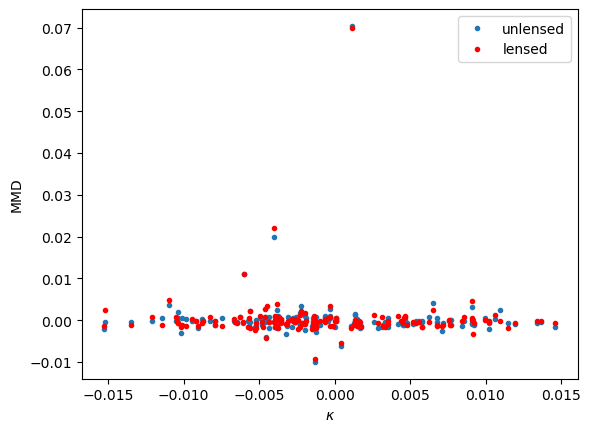

In [76]:
plt.figure()
plt.plot(kappamap[pixels_unlensed], MMDs_unlensed,  '.', label='unlensed')
plt.plot(kappamap[pixels_lensed], MMDs_lensed,  '.', color='r', label='lensed')
plt.legend()
plt.ylabel('MMD')
plt.xlabel(r'$\kappa$')
plt.show()

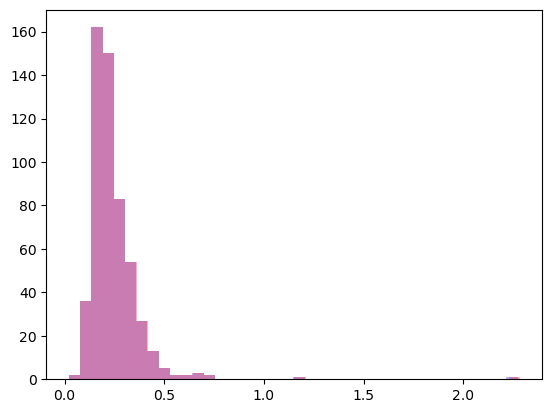

In [77]:
plt.figure()
plt.hist(intrinsic_sizes[catalogue2['pixel']==23999], bins=40, alpha=0.3, color='b')
plt.hist(observed_sizes[catalogue2['pixel']==23999], bins=40, alpha=0.3, color='r')
plt.show()

In [78]:
print(galaxy_pix_unique[156])
kappamap_with_galaxies = kappamap[galaxy_pix_unique]
np.max(kappamap_with_galaxies)


23999


np.float64(0.0146234675152306)

In [79]:
kappamap[23999]

np.float64(0.004669455322243848)

Current Problem:

We have a function that gives us the MMD for a given size distribution, and location of the galaxies. When we plot the MMDs as function of kappa for lensed and unlensed galaxies, there is no detectable difference.
Is the MMD computation wrong?
Is the observed size computation wrong?

Other possible reasons:

We do not have enough galaxies in the catalogue. The kappamap has too low values, in particular the greatest kappa value in a pixel that actually contains a galaxy is 0.01. Compare this to the plot in Noahs report: The shift of the distribution is tiny, even though kappa=0.05 and the pixel contains many more galaxies.

## Computing the mean of each pixel
Since the MMD led to no signal (i.e. no correlation between the MMD and kappa), I try to recreate the plot in Noah's report using the mean of each pixel to see where the error is.

In [80]:
mean_list = []
pixel_list = []
for p in galaxy_pix_unique:
    mask = (catalogue2['pixel']==p)
    mean = np.mean(intrinsic_sizes[mask])
    mean_list.append(mean)
    pixel_list.append(p)

mean_list = np.array(mean_list)
pixel_list = np.array(pixel_list)
    

In [81]:
mean_lensed = []
pixels_lensed_list=[]
for p in galaxy_pix_unique:
    mask = (catalogue2['pixel']==p)
    mean = np.mean(observed_sizes[mask])
    mean_lensed.append(mean)
    pixels_lensed_list.append(p)

mean_lensed = np.array(mean_lensed)
pixels_lensed_list = np.array(pixels_lensed_list)

In [82]:
mean_theory = np.mean(intrinsic_sizes)*(1.0 + kappamap[pixels_lensed_list]) 
m, b = np.polyfit(kappamap[pixels_lensed_list], mean_lensed,1)

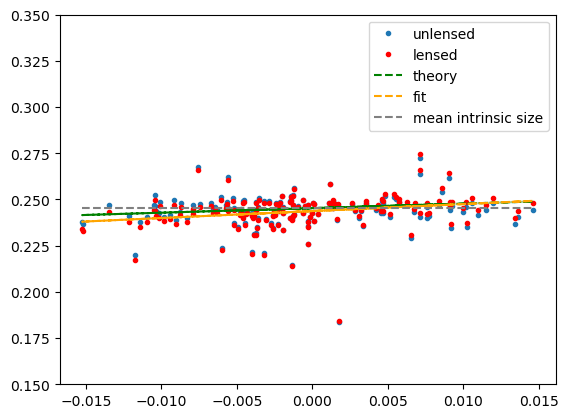

In [83]:
plt.figure()
plt.plot(kappamap[pixel_list], mean_list, '.', label='unlensed')
plt.plot(kappamap[pixels_lensed_list],mean_lensed, '.', color='r', label='lensed')
plt.plot(kappamap[pixels_lensed_list], mean_theory, '--', color='g', label='theory')
plt.plot(kappamap[pixels_lensed_list], m*kappamap[pixels_lensed_list]+b, '--', color='orange', label='fit')
plt.plot([np.min(kappamap[pixel_list]),np.max(kappamap[pixel_list])],[np.mean(intrinsic_sizes), np.mean(intrinsic_sizes)], '--', color='grey', label='mean intrinsic size')
plt.legend()
plt.ylim(0.15, 0.35)
plt.show()

### Compute the MMD again to get a signal